# Analisis Data Diabetes dan Implementasi Pipeline Klasifikasi Menggunakan Berbagai Model Machine

In [1]:
# General libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Preprocessing and training libraries
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import set_config
from sklearn.linear_model import LogisticRegression



Kodingan ini bertujuan untuk melakukan analisis data dan membangun model klasifikasi menggunakan machine learning. Langkah-langkah yang dilakukan mencakup:

Import Pustaka Utama: Mengimpor pustaka untuk manipulasi data, visualisasi, preprocessing, dan pemodelan.
Preprocessing Data: Menangani nilai yang hilang, melakukan encoding untuk kolom kategorikal, dan normalisasi fitur numerik.
Membangun dan Melatih Model: Menggunakan pipeline untuk menggabungkan preprocessing dan pelatihan model dengan LGBMClassifier.
Evaluasi Model: Menggunakan berbagai metrik evaluasi seperti F1-score dan confusion matrix untuk menilai performa model.

In [2]:
# Path ke dataset
file_path =  r'C:\Users\figoh\Documents\Semester 7\ML\UTS\diabetic_data.csv'

# Membaca dataset
data = pd.read_csv(file_path, na_values='?')  # Mengubah '?' menjadi NaN untuk missing values
print(f"The shape of the dataset is {data.shape}.\n")

# Menampilkan beberapa baris pertama dataset
data.head()


The shape of the dataset is (101766, 50).



C:\Users\figoh\AppData\Local\Temp\ipykernel_9768\3763936036.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, na_values='?')  # Mengubah '?' menjadi NaN untuk missing values


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Kodingan ini bertujuan untuk memuat dataset yang akan digunakan untuk analisis dan pemodelan. Langkah-langkahnya adalah:

Path Dataset: Mendefinisikan lokasi dataset (diabetic_data.csv) yang berisi data diabetes.
Membaca Dataset: Membaca file CSV dengan pandas, menggantikan simbol '?' dengan NaN untuk mempermudah penanganan nilai yang hilang.
Melihat Data Awal: Menampilkan beberapa baris pertama dataset untuk memeriksa struktur dan memahami jenis data yang ada.
Tujuan dari langkah ini adalah memastikan bahwa data berhasil dimuat dan bisa mulai dianalisis.

In [4]:
# Melihat informasi dataset
data.info()

# Memeriksa jumlah missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Kodingan ini digunakan untuk melakukan eksplorasi awal terhadap dataset. Langkah-langkahnya adalah:

Melihat Informasi Dataset: Menggunakan data.info() untuk mendapatkan ringkasan dataset, termasuk tipe data dan jumlah nilai yang tidak hilang di setiap kolom.
Memeriksa Missing Values: Menghitung jumlah nilai yang hilang (NaN) di setiap kolom, dan mencetak kolom yang memiliki nilai hilang.
Tujuan dari langkah ini adalah memahami karakteristik dataset, termasuk tipe data dan kolom dengan nilai hilang, sehingga dapat dilakukan langkah-langkah preprocessing yang sesuai.

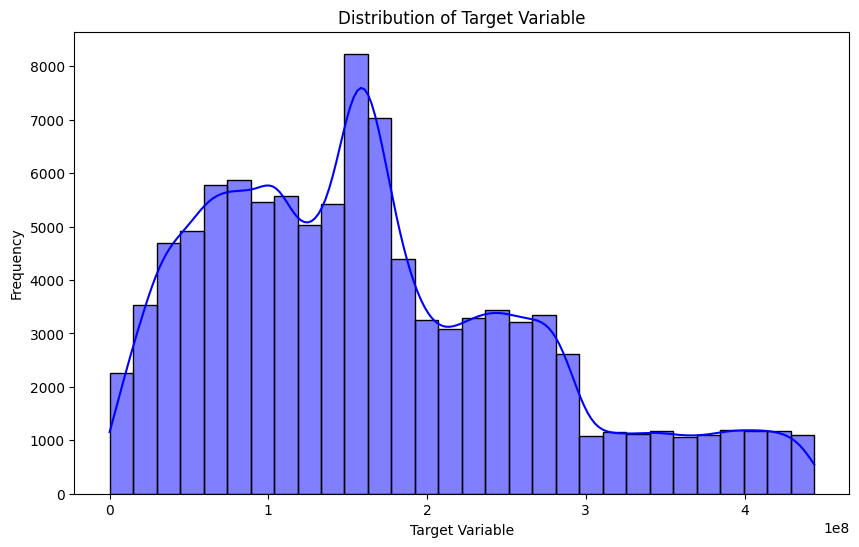

In [4]:
# Visualisasi distribusi target variabel
plt.figure(figsize=(10, 6))
sns.histplot(data[data.columns[0]], kde=True, bins=30, color='blue')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

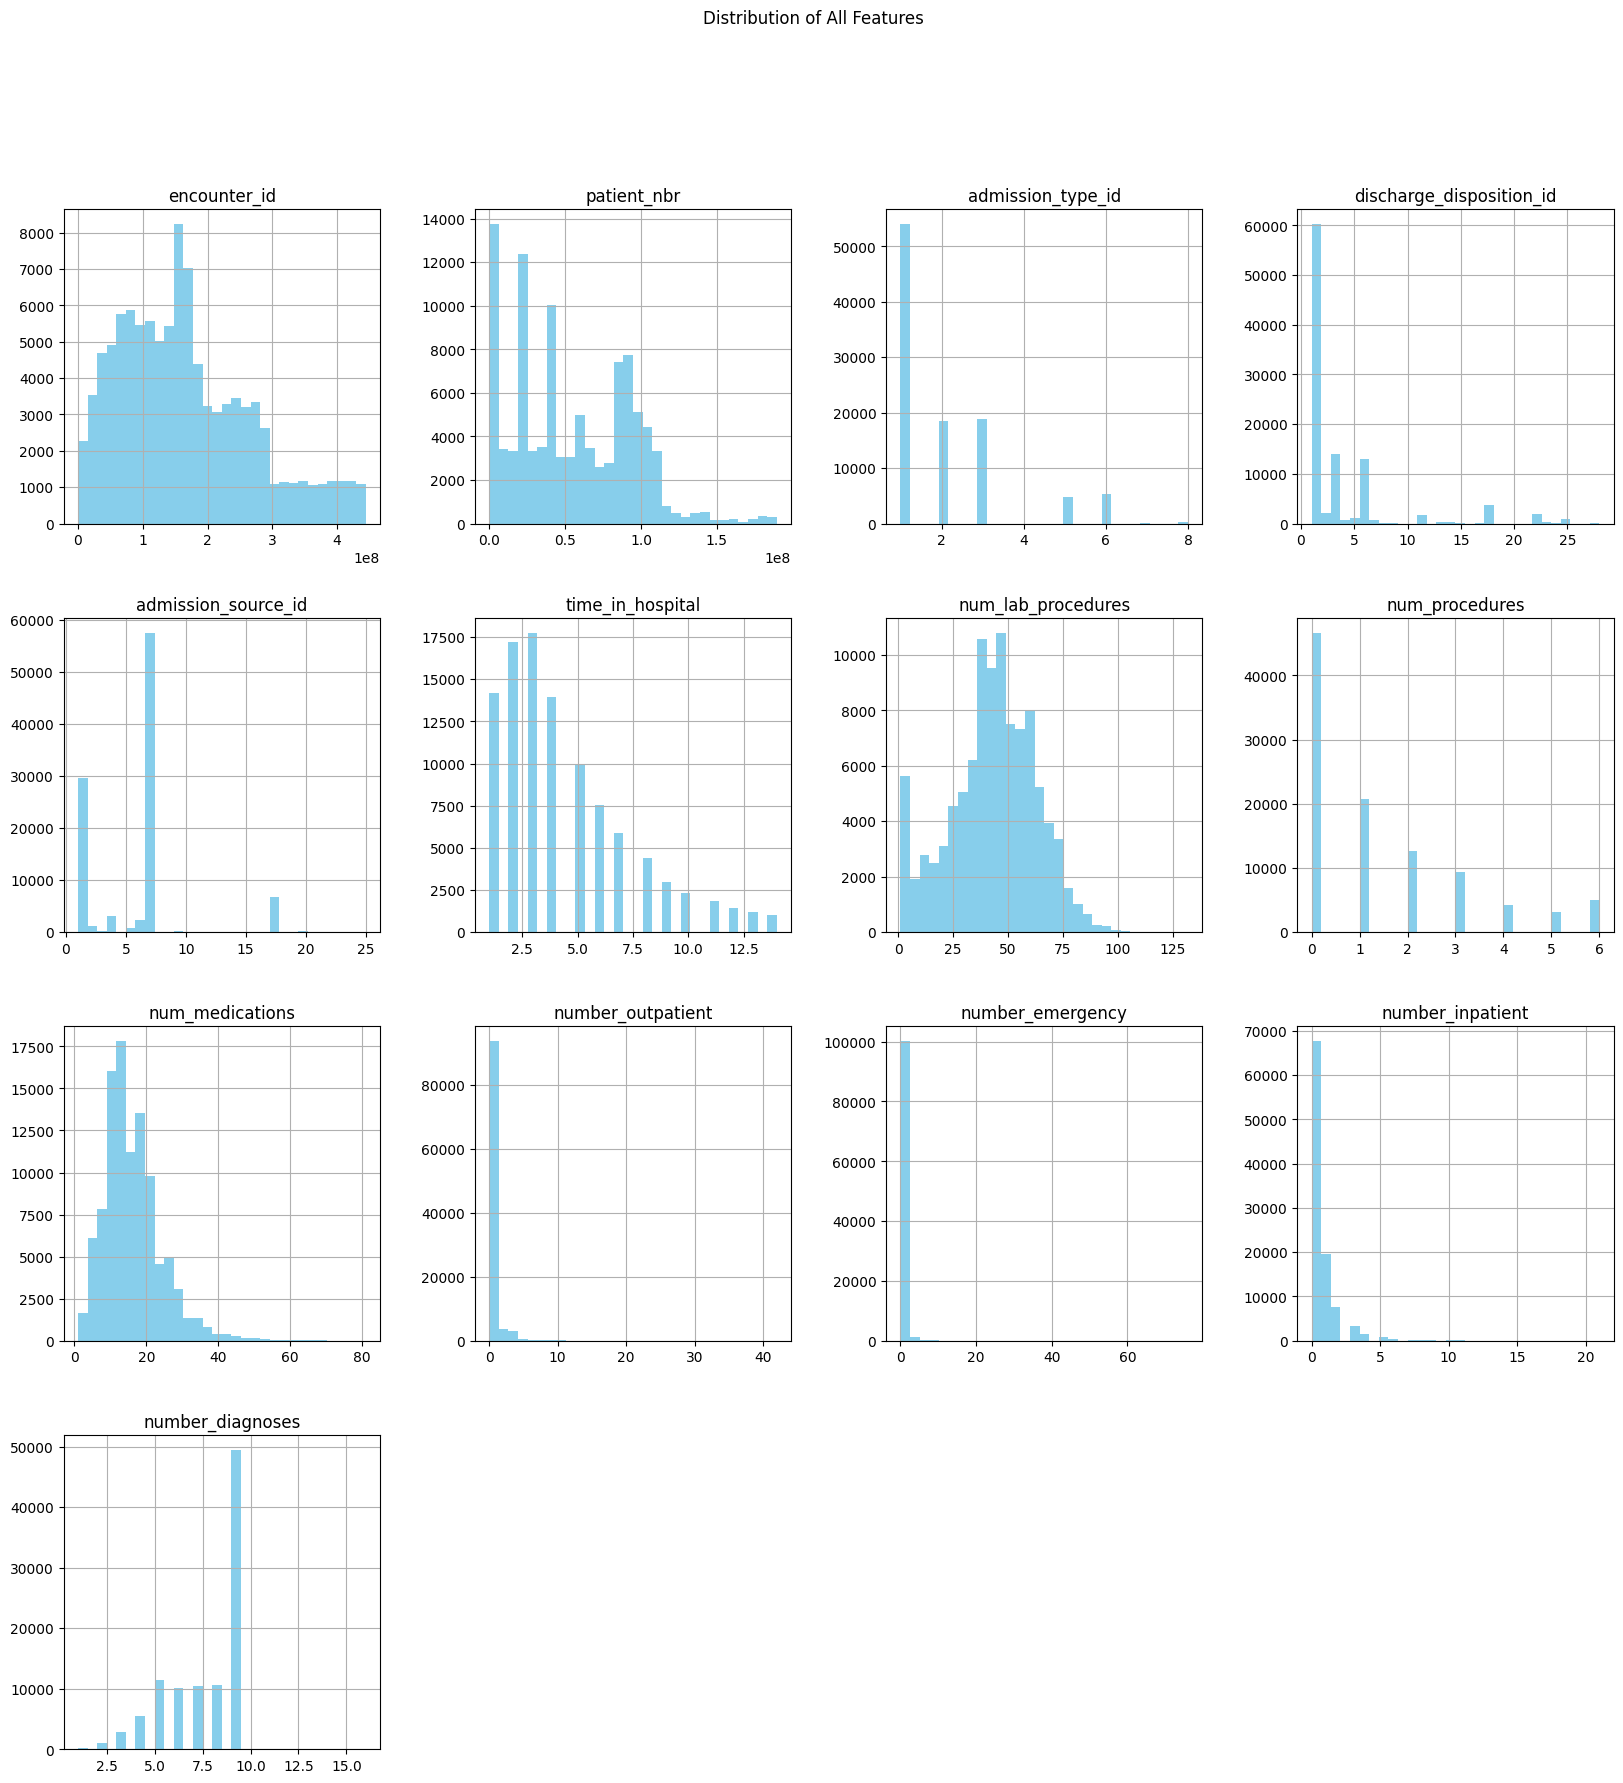

In [5]:
# Visualisasi distribusi setiap fitur
data.hist(figsize=(20, 20), bins=30, color='skyblue')
plt.suptitle('Distribution of All Features')
plt.show()

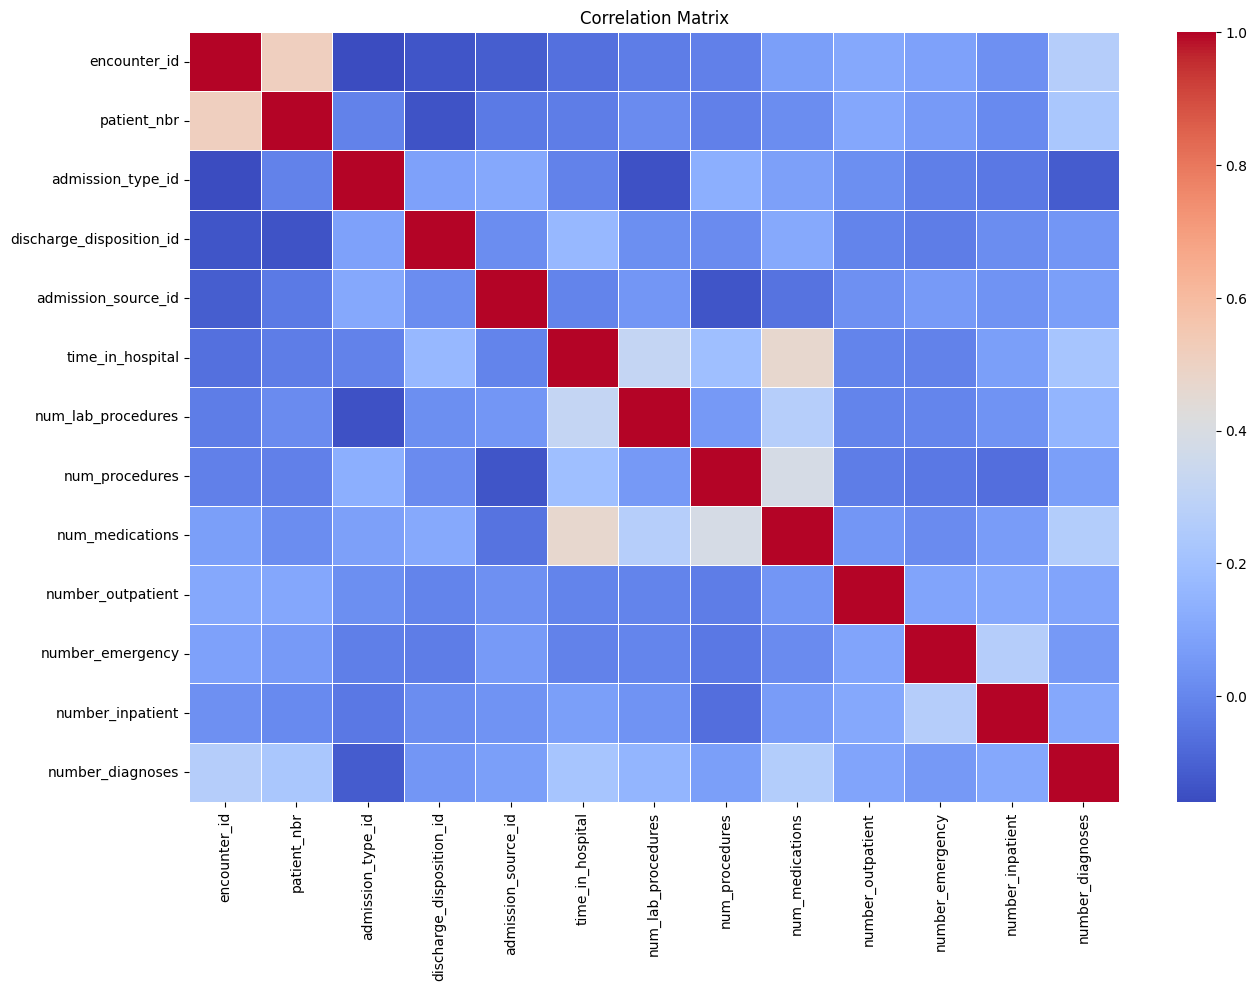

In [8]:
# Memilih hanya kolom numerik
numeric_data = data.select_dtypes(include=['number'])

# Visualisasi korelasi antar fitur
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


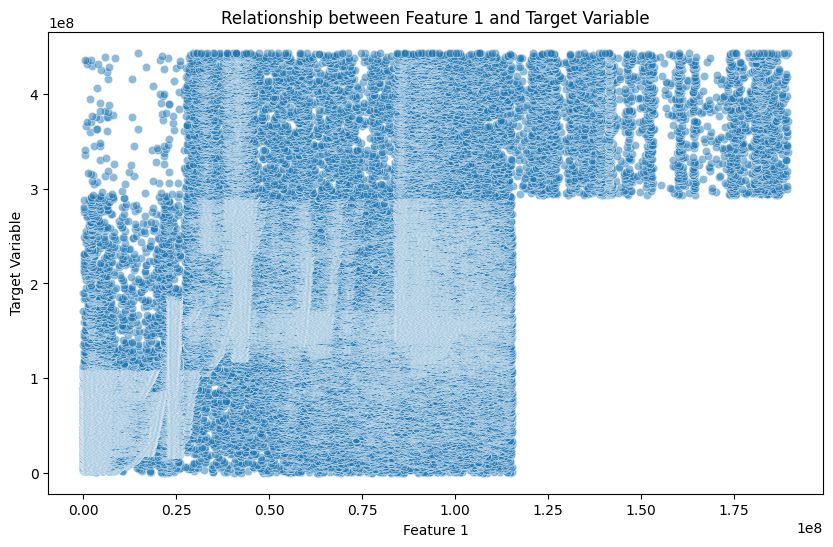

In [10]:
# Visualisasi hubungan antara fitur utama dan target
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[data.columns[1]], y=data[data.columns[0]], alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Target Variable')
plt.title('Relationship between Feature 1 and Target Variable')
plt.show()


In [5]:
# Mengelompokkan kolom berdasarkan tipe
cat_cols = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id',
    'admission_source_id', 'max_glu_serum', 'A1Cresult', 'metformin',
    'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
    'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed'
]
num_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]
ID_cols = ["encounter_id", "patient_nbr"]
diag_cols = ['diag_1', 'diag_2', 'diag_3']

print(f"Kategori Kolom:\n- Kategorikal: {len(cat_cols)}\n- Numerik: {len(num_cols)}\n- ID: {len(ID_cols)}\n- Diagnosis: {len(diag_cols)}")


Kategori Kolom:
- Kategorikal: 20
- Numerik: 8
- ID: 2
- Diagnosis: 3


Kodingan ini bertujuan untuk mengelompokkan kolom dataset berdasarkan tipe data dan perannya. Langkah-langkahnya adalah:

Mengelompokkan Kolom:

cat_cols: Kolom-kolom kategorikal yang berisi data dalam bentuk kategori atau label.
num_cols: Kolom-kolom numerik yang berisi data dalam bentuk angka.
ID_cols: Kolom yang berisi informasi ID unik untuk tiap entri.
diag_cols: Kolom yang berisi informasi diagnosis pasien.
Mencetak Jumlah Kolom per Kategori: Menampilkan jumlah kolom untuk setiap tipe data untuk memahami lebih baik struktur dataset.

Tujuan dari langkah ini adalah untuk mengelompokkan data agar lebih mudah dalam proses preprocessing selanjutnya, seperti encoding data kategorikal atau normalisasi data numerik.

In [6]:
# Menghapus kolom dengan terlalu banyak missing values
cols_to_drop = ['weight', 'payer_code', 'medical_specialty']
data = data.drop(columns=cols_to_drop)

print(f"Dataset shape setelah menghapus kolom: {data.shape}")


Dataset shape setelah menghapus kolom: (101766, 47)


Kodingan ini bertujuan untuk menghapus kolom yang memiliki terlalu banyak nilai yang hilang. Langkah-langkahnya adalah:

Mengidentifikasi Kolom yang Akan Dihapus: Menentukan kolom (weight, payer_code, medical_specialty) yang akan dihapus karena memiliki banyak nilai hilang yang tidak memungkinkan untuk diimputasi dengan tepat.
Menghapus Kolom: Menghapus kolom-kolom tersebut dari dataset menggunakan data.drop().
Menampilkan Ukuran Dataset: Menampilkan ukuran dataset setelah penghapusan kolom untuk memverifikasi perubahan.
Tujuan dari langkah ini adalah menyederhanakan dataset dengan menghilangkan kolom yang tidak memberikan banyak informasi atau sulit diimputasi, sehingga analisis menjadi lebih efisien.

In [7]:
# Imputasi missing values
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

# Imputasi untuk kolom kategorikal
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

# Imputasi untuk kolom numerik
data[num_cols] = num_imputer.fit_transform(data[num_cols])

# Verifikasi missing values
missing_values_after = data.isnull().sum().sum()
print(f"Sisa missing values setelah imputasi: {missing_values_after}")


Sisa missing values setelah imputasi: 1802


Kodingan ini bertujuan untuk mengatasi nilai yang hilang (missing values) dalam dataset. Langkah-langkahnya adalah:

Menentukan Strategi Imputasi:

cat_imputer: Menggunakan strategi most_frequent untuk menggantikan nilai hilang pada kolom kategorikal dengan nilai yang paling sering muncul.
num_imputer: Menggunakan strategi median untuk menggantikan nilai hilang pada kolom numerik dengan nilai tengah (median).
Imputasi Data:

Mengimputasi nilai yang hilang pada kolom kategorikal dan numerik menggunakan strategi yang sudah ditentukan.
Verifikasi Missing Values: Menghitung dan mencetak sisa nilai yang hilang setelah proses imputasi untuk memastikan bahwa tidak ada lagi missing values.

Tujuan dari langkah ini adalah untuk menangani nilai yang hilang dalam dataset agar dataset siap untuk digunakan dalam analisis dan pemodelan tanpa masalah data yang tidak lengkap.


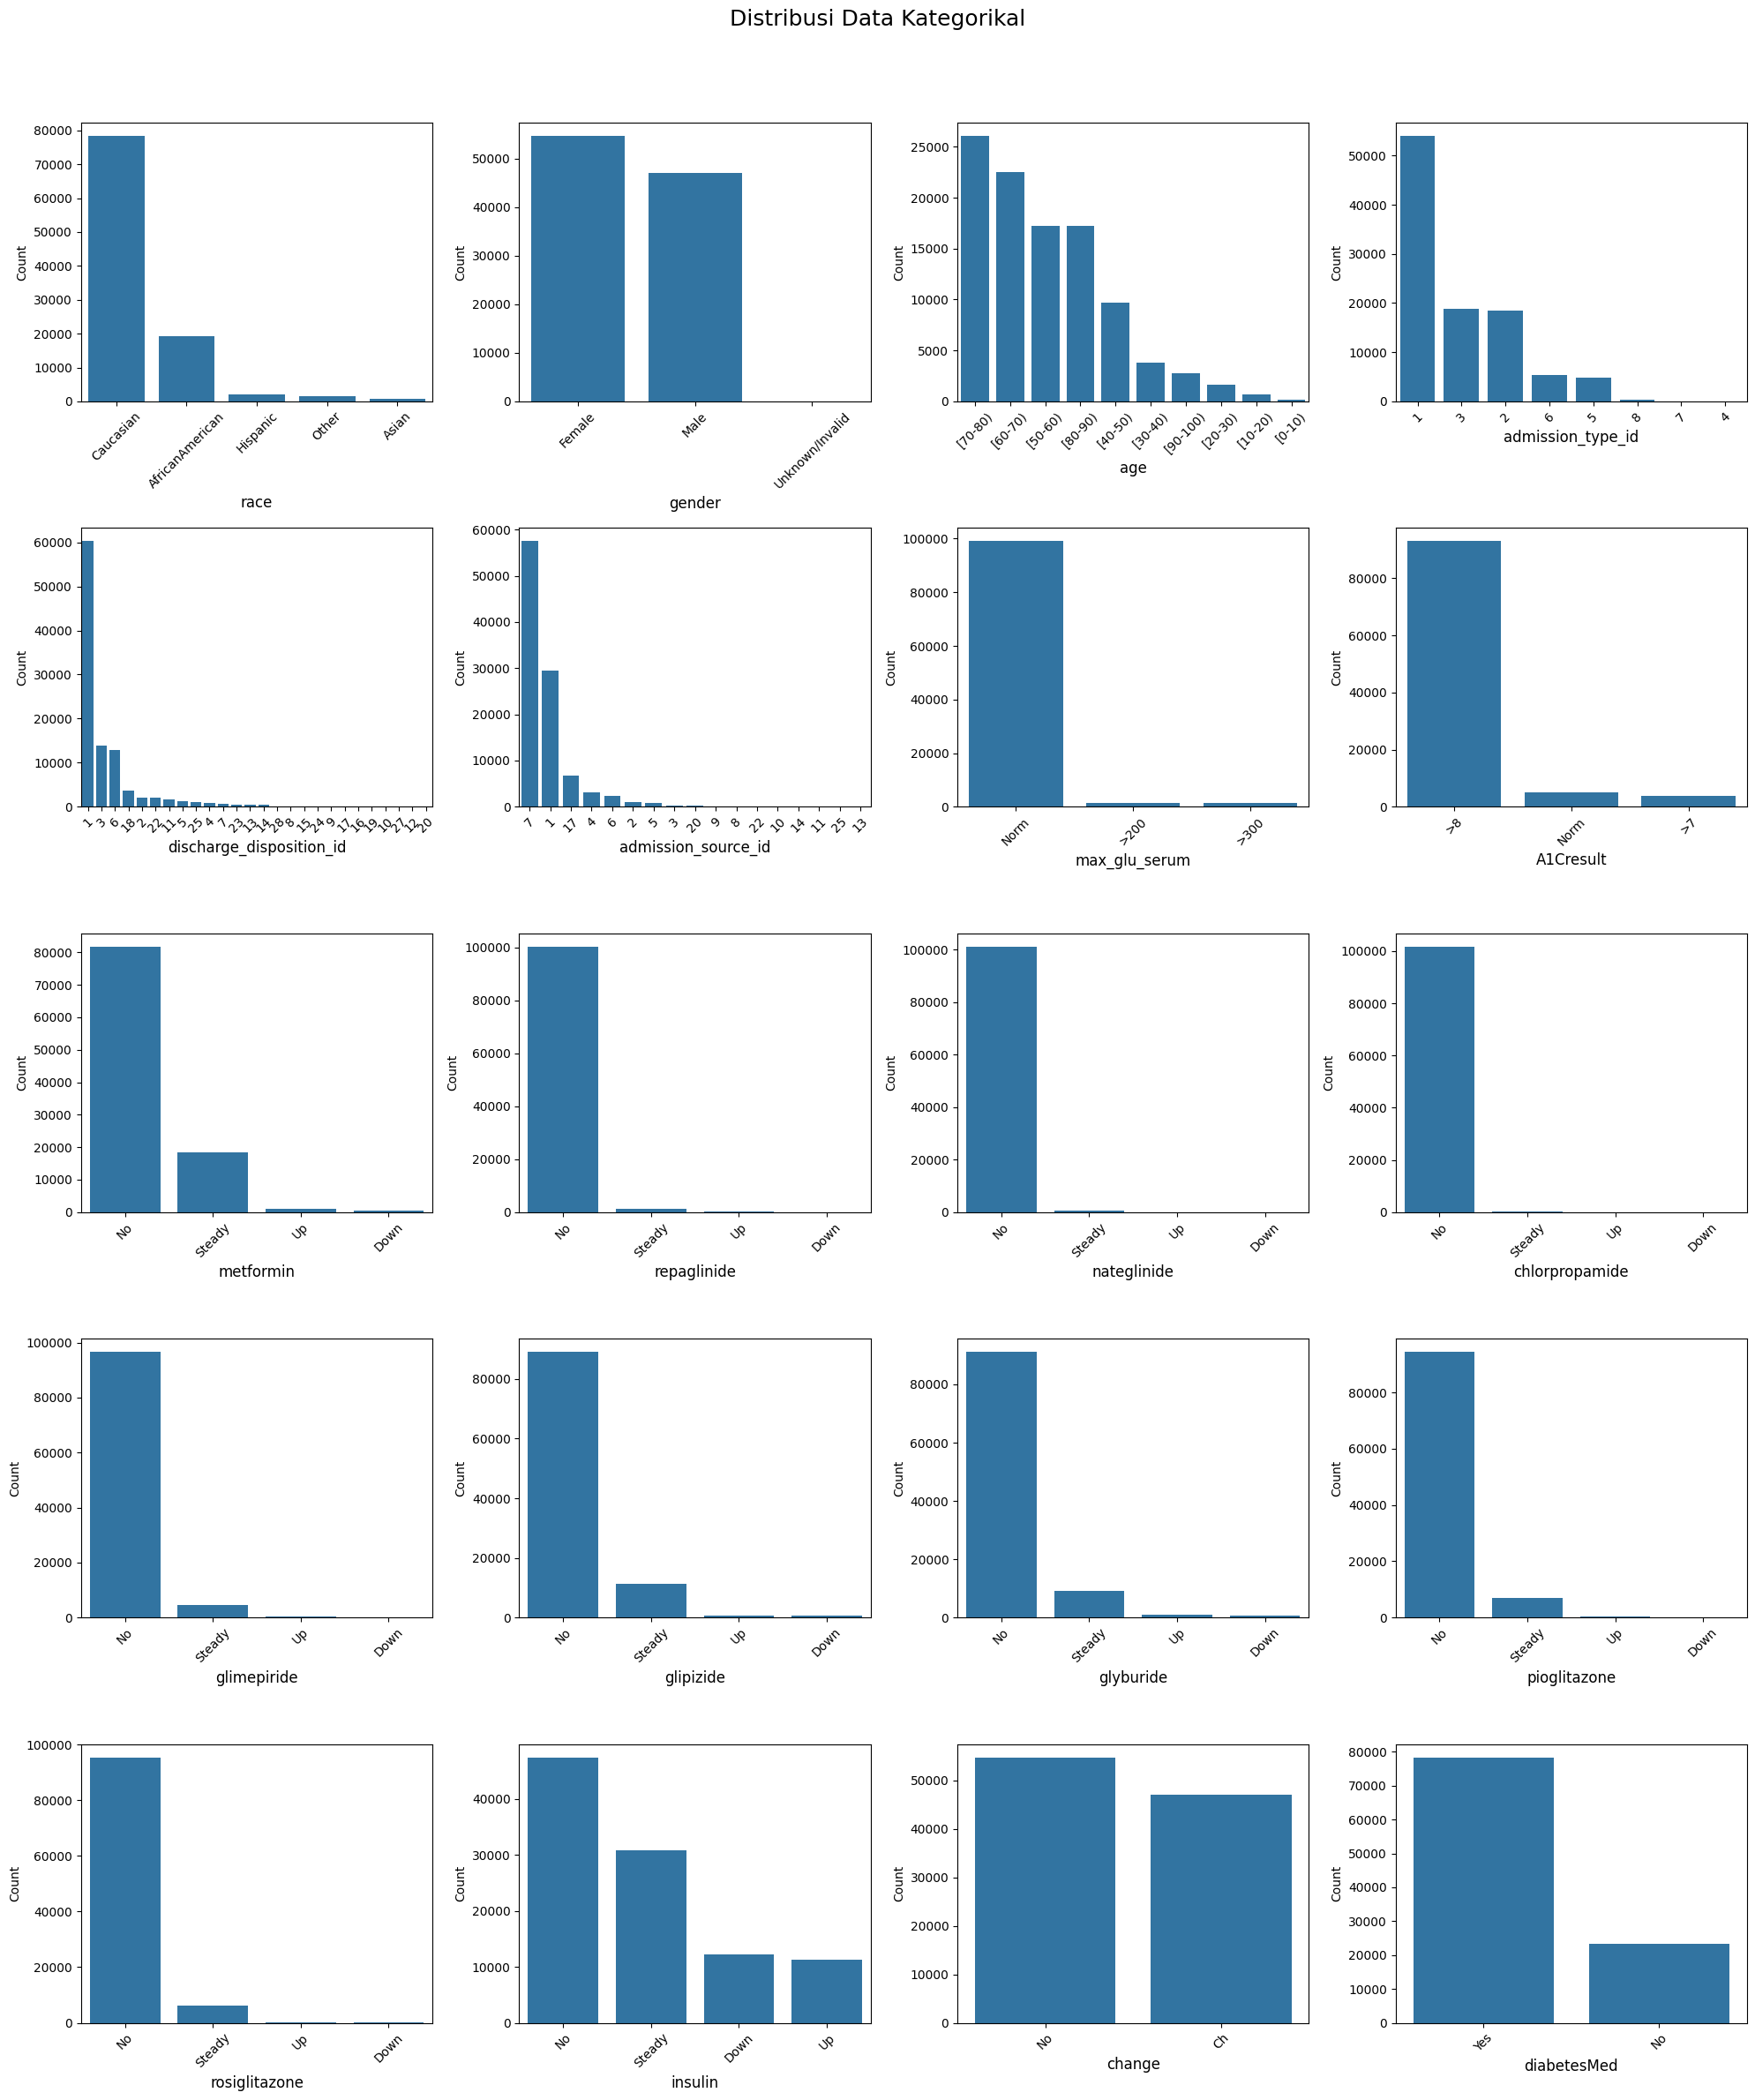

In [8]:
# Visualisasi distribusi data kategorikal
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))
plt.subplots_adjust(hspace=0.5)

for column, ax in zip(cat_cols, axs.ravel()):
    sns.countplot(data=data, x=column, ax=ax, order=data[column].value_counts().index)
    ax.set_xlabel(column, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel("Count")

plt.suptitle("Distribusi Data Kategorikal", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Kodingan ini bertujuan untuk memvisualisasikan distribusi data kategorikal dalam dataset. Langkah-langkahnya adalah:

Membuat Subplot: Membuat grid dari subplots (5x4) untuk menampilkan visualisasi dari setiap kolom kategorikal.
Visualisasi Data Kategorikal: Menggunakan sns.countplot() untuk membuat grafik batang (bar plot) yang menunjukkan jumlah kemunculan setiap kategori dalam setiap kolom.
Pengaturan Visualisasi: Mengatur label dan tampilan setiap grafik untuk memastikan informasi mudah dibaca.
Tujuan dari langkah ini adalah untuk memahami distribusi kategori di setiap kolom, mengidentifikasi kategori yang dominan, dan melihat potensi ketidakseimbangan yang mungkin mempengaruhi analisis dan model yang akan dibangun.

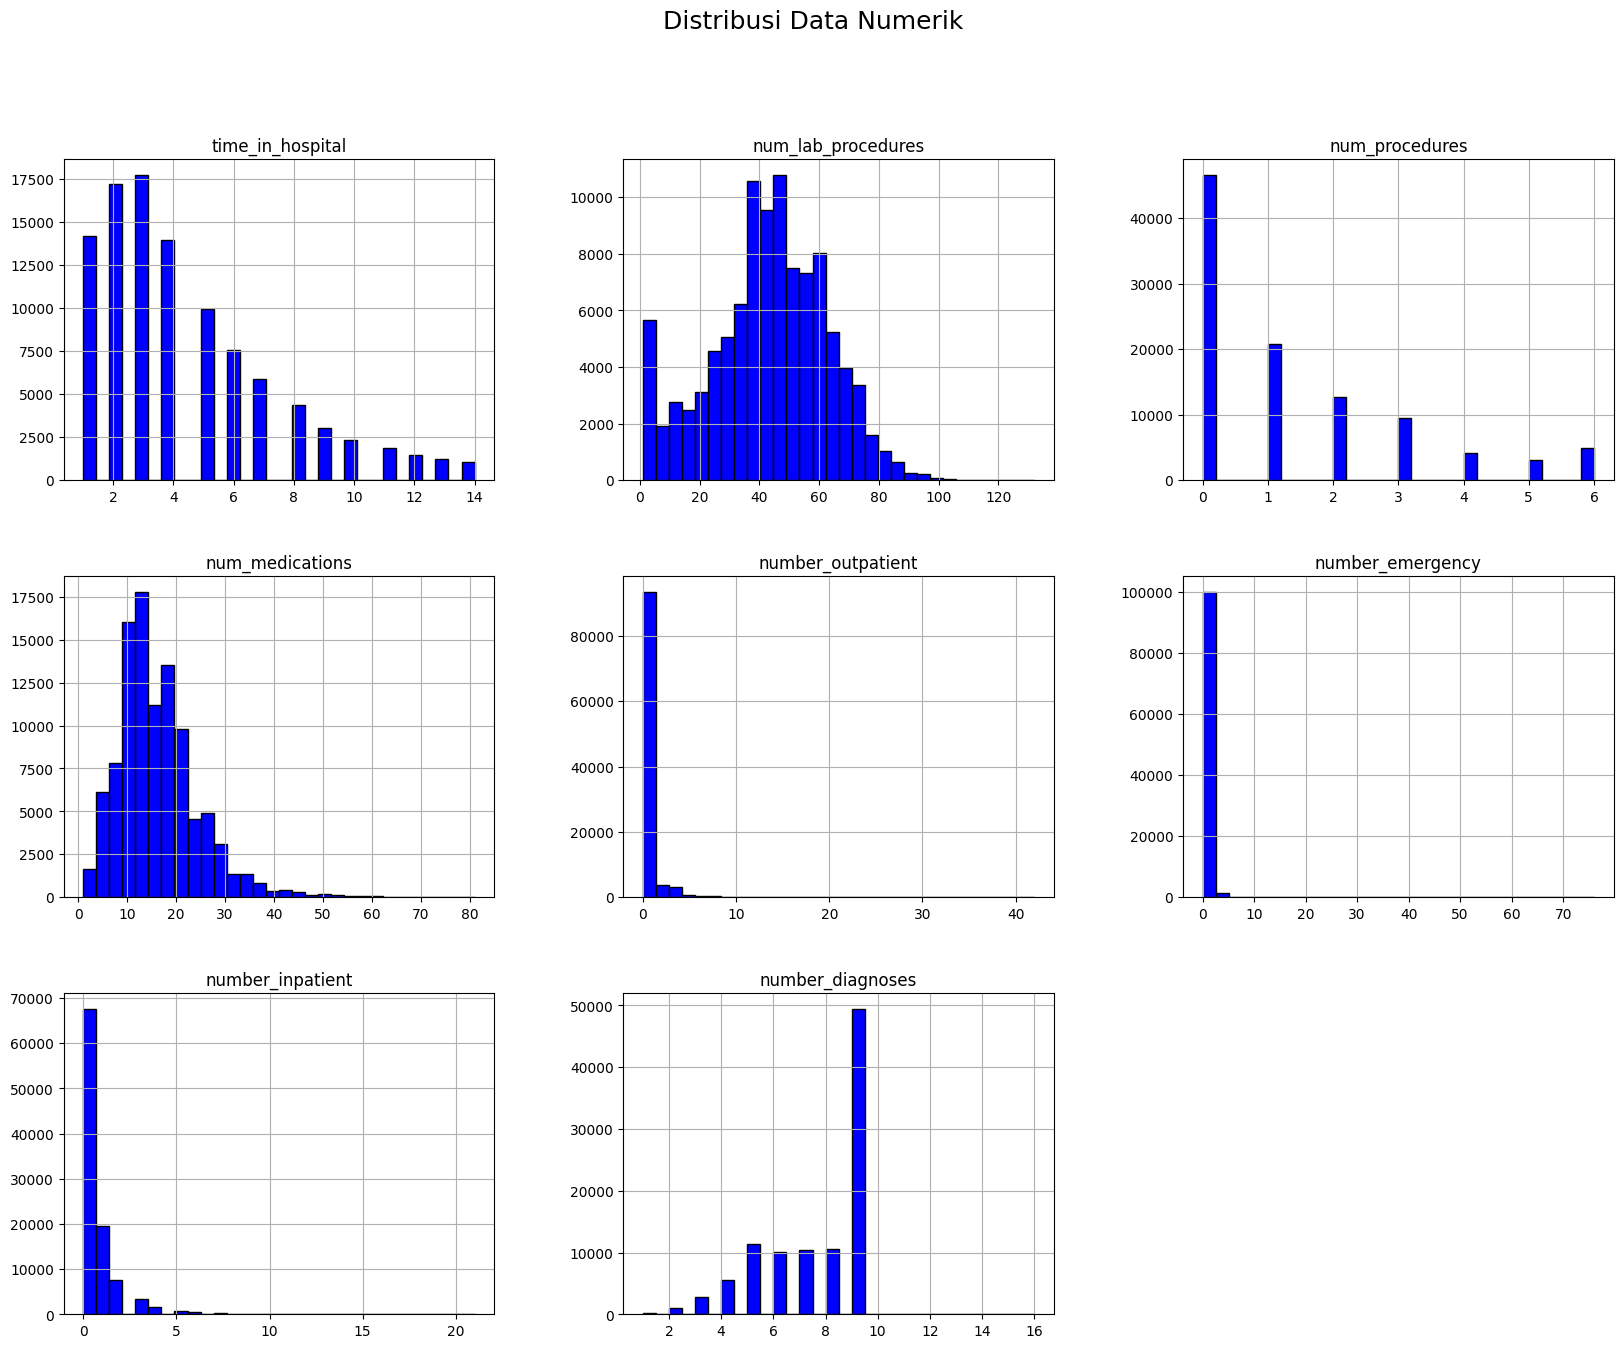

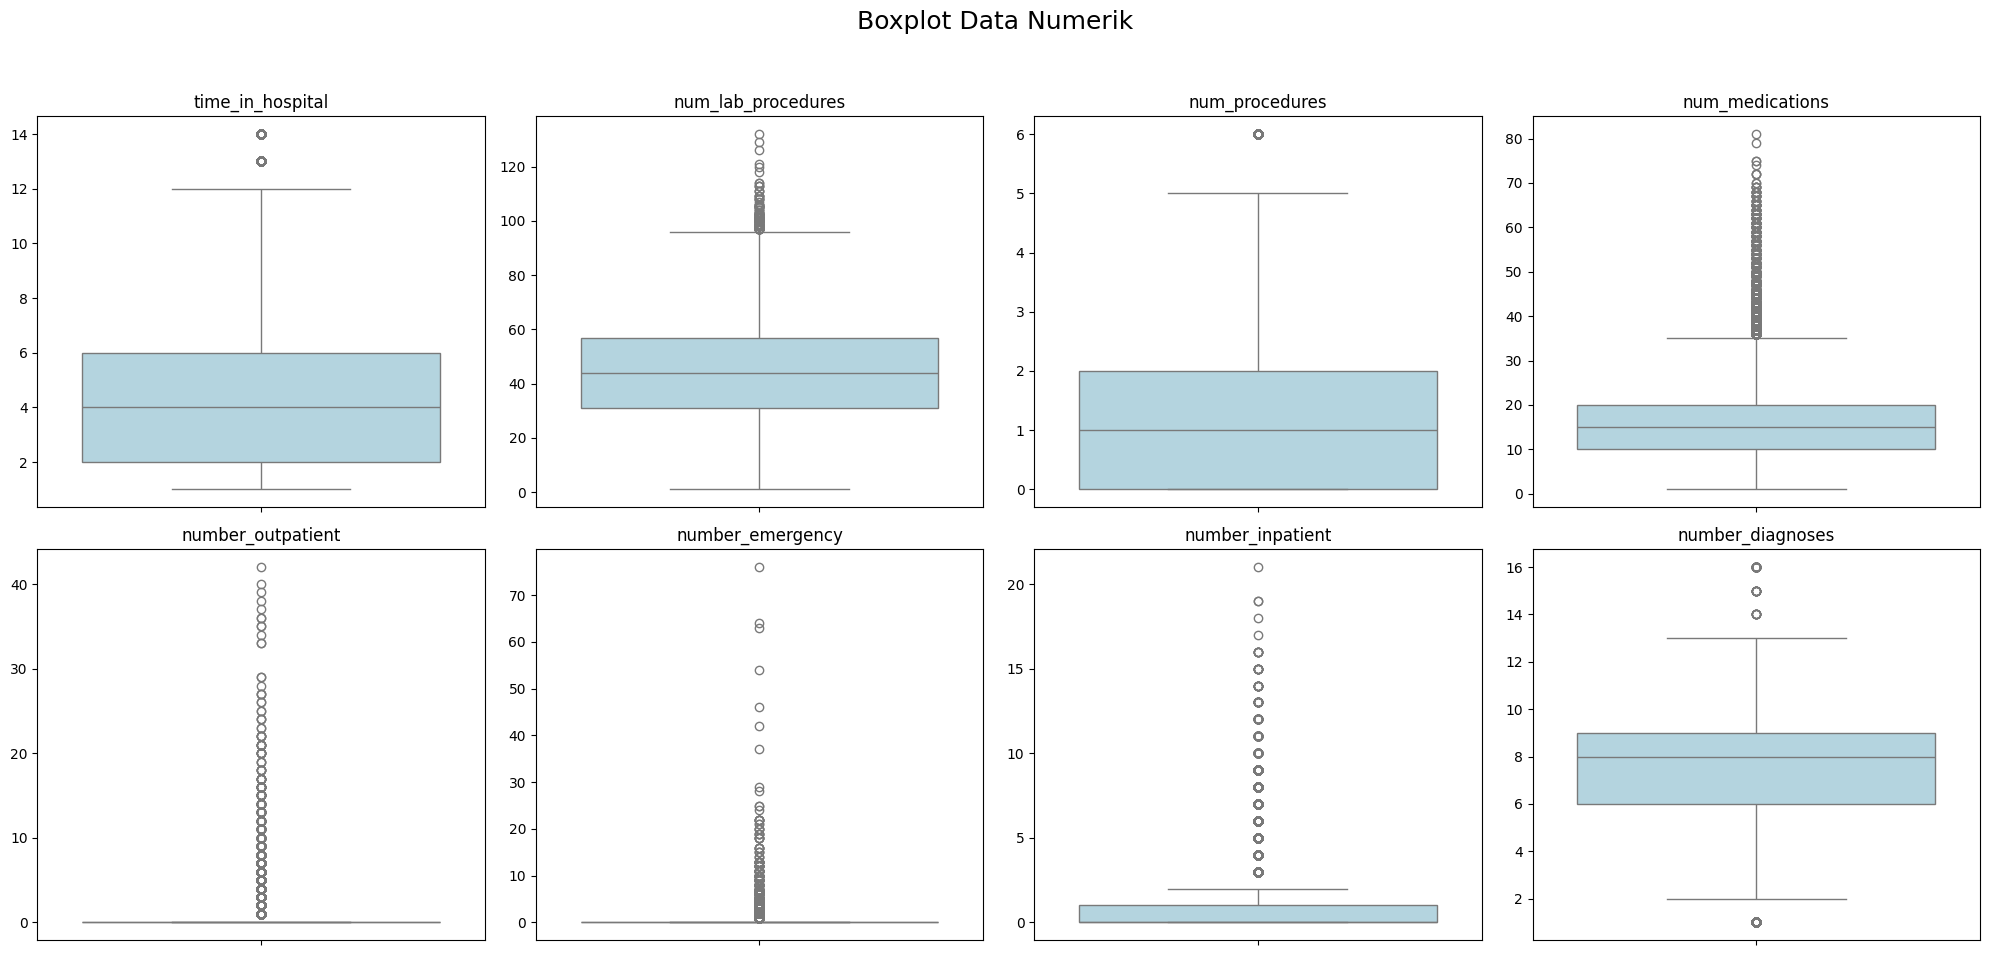

In [9]:
# Histogram untuk kolom numerik
data[num_cols].hist(figsize=(20, 15), bins=30, color='blue', edgecolor='black')
plt.suptitle("Distribusi Data Numerik", fontsize=18)
plt.show()

# Boxplot untuk mendeteksi outliers
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

for column, ax in zip(num_cols, axs.ravel()):
    sns.boxplot(data=data, y=column, ax=ax, color='lightblue')
    ax.set_title(column, fontsize=12)
    ax.set_ylabel("")

plt.suptitle("Boxplot Data Numerik", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Kodingan ini bertujuan untuk memvisualisasikan distribusi dan mendeteksi outliers pada kolom numerik dalam dataset. Langkah-langkahnya adalah:

Histogram untuk Kolom Numerik:

Membuat histogram untuk setiap kolom numerik menggunakan data[num_cols].hist().
Histogram ini membantu memahami distribusi setiap fitur numerik, seperti apakah data terdistribusi normal, menceng ke kanan atau kiri, atau memiliki distribusi lainnya.
Boxplot untuk Mendeteksi Outliers:

Membuat boxplot untuk setiap kolom numerik dengan menggunakan sns.boxplot().
Boxplot ini memudahkan untuk mengidentifikasi nilai-nilai outlier (nilai yang jauh dari kebanyakan data) yang bisa mempengaruhi analisis dan model.
Tujuan dari langkah ini adalah untuk memahami bagaimana data numerik terdistribusi serta mengidentifikasi potensi outliers yang mungkin memerlukan penanganan khusus sebelum melanjutkan ke tahap analisis atau pemodelan selanjutnya.

In [11]:
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['readmitted'])  # Drop kolom target
y = data['readmitted']  # Kolom target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

print(f"Dimensi Data Latih: {X_train.shape}, Data Uji: {X_test.shape}")


Dimensi Data Latih: (91589, 46), Data Uji: (10177, 46)



Kodingan ini bertujuan untuk mempersiapkan dataset untuk pelatihan model machine learning. Langkah-langkahnya adalah:

Memisahkan Fitur dan Target:

X: Berisi semua fitur kecuali kolom readmitted yang merupakan target.
y: Berisi kolom readmitted sebagai target untuk klasifikasi.
Membagi Data Menjadi Data Latih dan Uji:

Menggunakan train_test_split() untuk membagi dataset menjadi data latih (X_train, y_train) dan data uji (X_test, y_test).
test_size=0.1 menunjukkan bahwa 10% data akan digunakan sebagai data uji.
Parameter stratify=y digunakan untuk memastikan distribusi kelas pada data latih dan uji tetap seimbang.
Tujuan dari langkah ini adalah mempersiapkan data latih untuk membangun model dan data uji untuk mengevaluasi performa model secara adil.







In [12]:
# Import library untuk preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pipeline untuk preprocessing
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan pipeline untuk numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

# Transformasi data latih dan data uji
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print(f"Shape Data Latih (Setelah Preprocessing): {X_train_prepared.shape}")
print(f"Shape Data Uji (Setelah Preprocessing): {X_test_prepared.shape}")


Shape Data Latih (Setelah Preprocessing): (91589, 127)
Shape Data Uji (Setelah Preprocessing): (10177, 127)


odingan ini bertujuan untuk melakukan preprocessing terhadap data latih dan data uji dengan menggunakan pipeline. Langkah-langkahnya adalah:

Membuat Pipeline Preprocessing:

num_pipeline: Menggunakan MinMaxScaler() untuk menormalkan kolom numerik agar berada dalam rentang tertentu.
cat_pipeline: Menggunakan OneHotEncoder() untuk mengubah kolom kategorikal menjadi bentuk numerik. Parameter handle_unknown='ignore' digunakan untuk menangani kategori yang mungkin tidak ada dalam data latih.
Gabungkan Pipeline dengan ColumnTransformer:

Menggabungkan pipeline numerik dan kategorikal menjadi satu pipeline preprocessor yang akan diterapkan pada kolom yang sesuai (num_cols dan cat_cols).
Transformasi Data:

Menerapkan pipeline preprocessing pada data latih (X_train) dan data uji (X_test) untuk menghasilkan data yang siap digunakan dalam model (X_train_prepared dan X_test_prepared).
Tujuan dari langkah ini adalah untuk melakukan preprocessing terhadap data dengan konsisten, sehingga model yang dilatih dapat bekerja dengan baik pada data yang sudah diubah menjadi format yang lebih sesuai untuk algoritma machine learning.









In [12]:
# Import library untuk model LightGBM
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Inisialisasi dan melatih model
model = LGBMClassifier(random_state=42)
model.fit(X_train_prepared, y_train)

# Evaluasi pada data latih
y_train_pred = model.predict(X_train_prepared)
train_f1_score = f1_score(y_train, y_train_pred, average="micro")
print(f"F1-Score pada Data Latih: {train_f1_score:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 106
[LightGBM] [Info] Start training from score -2.192867
[LightGBM] [Info] Start training from score -1.051888
[LightGBM] [Info] Start training from score -0.617806
F1-Score pada Data Latih: 0.6100


Kodingan ini bertujuan untuk membangun dan mengevaluasi model klasifikasi menggunakan algoritma LightGBM. Langkah-langkahnya adalah:

Inisialisasi Model LightGBM:

Menggunakan LGBMClassifier dari pustaka lightgbm untuk membuat model klasifikasi yang cepat dan efisien. Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten.
Melatih Model:

Melatih model (fit()) menggunakan data latih yang telah diproses (X_train_prepared dan y_train).
Evaluasi pada Data Latih:

Melakukan prediksi (predict()) pada data latih dan menghitung F1-Score menggunakan f1_score() untuk mengevaluasi kinerja model pada data latih.
F1-Score memberikan gambaran keseimbangan antara presisi dan recall dalam klasifikasi.
Tujuan dari langkah ini adalah untuk membangun model klasifikasi menggunakan LightGBM dan mengevaluasi performanya pada data latih guna melihat seberapa baik model tersebut mempelajari pola dari data.

In [13]:
# Evaluasi pada data uji
y_test_pred = model.predict(X_test_prepared)

# F1-Score
test_f1_score = f1_score(y_test, y_test_pred, average="micro")
print(f"F1-Score pada Data Uji: {test_f1_score:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(report)


F1-Score pada Data Uji: 0.5883
Confusion Matrix:
[[  30  439  667]
 [  27 1372 2156]
 [  18  883 4585]]
Classification Report:
              precision    recall  f1-score   support

         <30       0.40      0.03      0.05      1136
         >30       0.51      0.39      0.44      3555
          NO       0.62      0.84      0.71      5486

    accuracy                           0.59     10177
   macro avg       0.51      0.42      0.40     10177
weighted avg       0.56      0.59      0.54     10177



Kodingan ini bertujuan untuk mengevaluasi performa model LightGBM pada data uji. Langkah-langkahnya adalah:

Evaluasi pada Data Uji:

Menggunakan model yang telah dilatih untuk membuat prediksi (predict()) pada data uji (X_test_prepared).
Menghitung F1-Score:

Menghitung F1-Score pada data uji menggunakan f1_score(). F1-Score merupakan metrik evaluasi yang menggabungkan presisi dan recall untuk melihat performa keseluruhan model.
Confusion Matrix:

Menggunakan confusion_matrix() untuk menunjukkan matriks konfusi yang menggambarkan performa model dalam memprediksi kelas yang benar dan salah, sehingga dapat melihat distribusi prediksi yang benar dan salah.
Classification Report:

Menggunakan classification_report() untuk memberikan ringkasan metrik evaluasi seperti precision, recall, dan F1-Score untuk setiap kelas.
Tujuan dari langkah ini adalah untuk mengevaluasi performa model pada data uji dengan menggunakan berbagai metrik, sehingga dapat menilai seberapa baik model mampu menggeneralisasi pada data yang belum pernah dilihat sebelumnya.









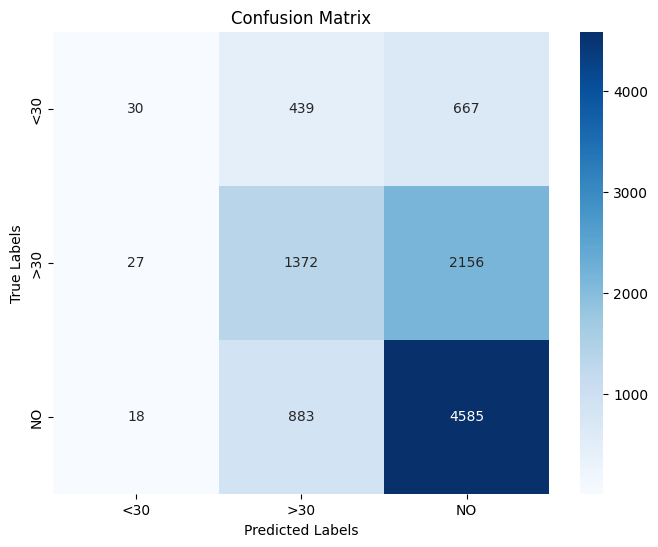

In [14]:
# Visualisasi Confusion Matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Kodingan ini bertujuan untuk memvisualisasikan confusion matrix dari hasil prediksi model. Langkah-langkahnya adalah:

Menggunakan Seaborn untuk Visualisasi:

Menggunakan sns.heatmap() untuk membuat heatmap dari confusion matrix (cm). Heatmap ini memberikan tampilan visual dari seberapa sering model memprediksi kelas dengan benar atau salah.
Setiap elemen dalam matriks ditampilkan dengan anotasi angka (annot=True) dan menggunakan skema warna (cmap='Blues') untuk memberikan kontras.
Pengaturan Grafik:

Label pada sumbu x dan y diatur untuk menunjukkan label prediksi dan label sebenarnya (Predicted Labels dan True Labels).
Judul grafik diberikan sebagai Confusion Matrix.
Tujuan dari langkah ini adalah untuk memberikan tampilan visual dari hasil confusion matrix, sehingga memudahkan analisis terhadap performa model, terutama untuk melihat kelas mana yang sering mengalami kesalahan prediksi. Visualisasi ini membantu mengidentifikasi pola-pola dalam kesalahan model dan memberikan wawasan untuk perbaikan lebih lanjut.

In [15]:
from sklearn.model_selection import GridSearchCV

# Definisi parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_micro',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Melakukan pencarian pada data latih
grid_search.fit(X_train_prepared, y_train)

# Menampilkan hasil terbaik
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1-Score: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 91589, number of used features: 106
[LightGBM] [Info] Start training from score -2.192867
[LightGBM] [Info] Start training from score -1.051888
[LightGBM] [Info] Start training from score -0.617806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

Kodingan ini bertujuan untuk melakukan hyperparameter tuning menggunakan GridSearchCV untuk meningkatkan performa model LightGBM. Langkah-langkahnya adalah:

Definisi Parameter yang Akan Diuji:

Mendefinisikan parameter yang akan diuji (param_grid) seperti n_estimators, max_depth, learning_rate, dan subsample. Parameter-parameter ini berperan dalam mengendalikan kompleksitas dan performa model.
Inisialisasi GridSearchCV:

Menggunakan GridSearchCV() untuk mencari kombinasi parameter terbaik berdasarkan metrik F1-score (scoring='f1_micro') dengan cross-validation sebanyak 5 kali (cv=5).
verbose=2 digunakan untuk memberikan detail proses selama pencarian parameter dan n_jobs=-1 untuk menggunakan seluruh core CPU agar proses lebih cepat.
Melakukan Pencarian pada Data Latih:

Melatih model menggunakan GridSearchCV pada data latih (X_train_prepared dan y_train) untuk menemukan kombinasi parameter terbaik.
Menampilkan Hasil Terbaik:

Menampilkan parameter terbaik (best_params_) dan F1-Score terbaik (best_score_) untuk model setelah tuning.
Tujuan dari langkah ini adalah menemukan kombinasi parameter yang optimal untuk model LightGBM, sehingga meningkatkan akurasi dan performa model saat melakukan prediksi pada data uji. Hyperparameter tuning membantu model untuk generalisasi yang lebih baik dan mengurangi kemungkinan overfitting atau underfitting.

In [16]:
# Model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Evaluasi pada data uji
y_test_pred_best = best_model.predict(X_test_prepared)

# F1-Score
test_f1_score_best = f1_score(y_test, y_test_pred_best, average="micro")
print(f"F1-Score pada Data Uji (Setelah Tuning): {test_f1_score_best:.4f}")

# Classification Report
report_best = classification_report(y_test, y_test_pred_best)
print("Classification Report (Setelah Tuning):")
print(report_best)


F1-Score pada Data Uji (Setelah Tuning): 0.5852
Classification Report (Setelah Tuning):
              precision    recall  f1-score   support

         <30       0.41      0.04      0.07      1136
         >30       0.50      0.39      0.44      3555
          NO       0.62      0.83      0.71      5486

    accuracy                           0.59     10177
   macro avg       0.51      0.42      0.41     10177
weighted avg       0.56      0.59      0.54     10177



Kodingan ini bertujuan untuk mengevaluasi performa model LightGBM setelah dilakukan hyperparameter tuning dengan GridSearchCV. Langkah-langkahnya adalah:

Model dengan Parameter Terbaik:

Mengambil model terbaik (best_model) dari hasil GridSearchCV yang memiliki parameter optimal berdasarkan proses pencarian sebelumnya.
Evaluasi pada Data Uji:

Menggunakan model terbaik untuk membuat prediksi (predict()) pada data uji (X_test_prepared).
Menghitung F1-Score:

Menghitung F1-Score pada data uji dengan model yang sudah dituning. F1-Score ini digunakan untuk membandingkan performa model sebelum dan setelah tuning.
Classification Report:

Menampilkan classification report untuk model terbaik, yang mencakup metrik evaluasi seperti precision, recall, dan F1-Score untuk setiap kelas.
Tujuan dari langkah ini adalah untuk mengevaluasi performa model setelah dilakukan tuning, melihat apakah tuning hyperparameter berhasil meningkatkan akurasi dan generalisasi model pada data yang belum pernah dilihat sebelumnya.

In [17]:
# Model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Evaluasi pada data uji
y_test_pred_best = best_model.predict(X_test_prepared)

# F1-Score
test_f1_score_best = f1_score(y_test, y_test_pred_best, average="micro")
print(f"F1-Score pada Data Uji (Setelah Tuning): {test_f1_score_best:.4f}")

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_test_pred_best)
print("Confusion Matrix (Setelah Tuning):")
print(cm_best)

# Classification Report
report_best = classification_report(y_test, y_test_pred_best)
print("Classification Report (Setelah Tuning):")
print(report_best)


F1-Score pada Data Uji (Setelah Tuning): 0.5852
Confusion Matrix (Setelah Tuning):
[[  46  431  659]
 [  37 1371 2147]
 [  28  919 4539]]
Classification Report (Setelah Tuning):
              precision    recall  f1-score   support

         <30       0.41      0.04      0.07      1136
         >30       0.50      0.39      0.44      3555
          NO       0.62      0.83      0.71      5486

    accuracy                           0.59     10177
   macro avg       0.51      0.42      0.41     10177
weighted avg       0.56      0.59      0.54     10177



Kodingan ini bertujuan untuk mengevaluasi performa model LightGBM terbaik setelah hyperparameter tuning menggunakan GridSearchCV. Langkah-langkahnya adalah:

Model dengan Parameter Terbaik:

Mengambil model terbaik (best_model) dari hasil GridSearchCV yang memiliki parameter optimal untuk meningkatkan performa.
Evaluasi pada Data Uji:

Menggunakan model terbaik untuk melakukan prediksi (predict()) pada data uji (X_test_prepared).
Menghitung F1-Score:

Menghitung F1-Score menggunakan data uji untuk menilai kinerja model yang sudah dituning. F1-Score ini digunakan untuk membandingkan performa sebelum dan sesudah tuning.
Confusion Matrix:

Membuat confusion matrix (cm_best) untuk melihat jumlah prediksi benar dan salah yang dilakukan oleh model setelah tuning.
Classification Report:

Menampilkan classification report untuk memberikan ringkasan metrik evaluasi seperti precision, recall, dan F1-Score untuk setiap kelas.
Tujuan dari langkah ini adalah untuk melihat performa akhir model dengan parameter optimal yang diperoleh dari tuning, memastikan apakah model tersebut mengalami peningkatan dalam hal akurasi dan kualitas prediksi pada data uji.

C:\Users\figoh\AppData\Local\Temp\ipykernel_9376\3369570033.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df[:20], x='Importance', y='Feature', palette='viridis')


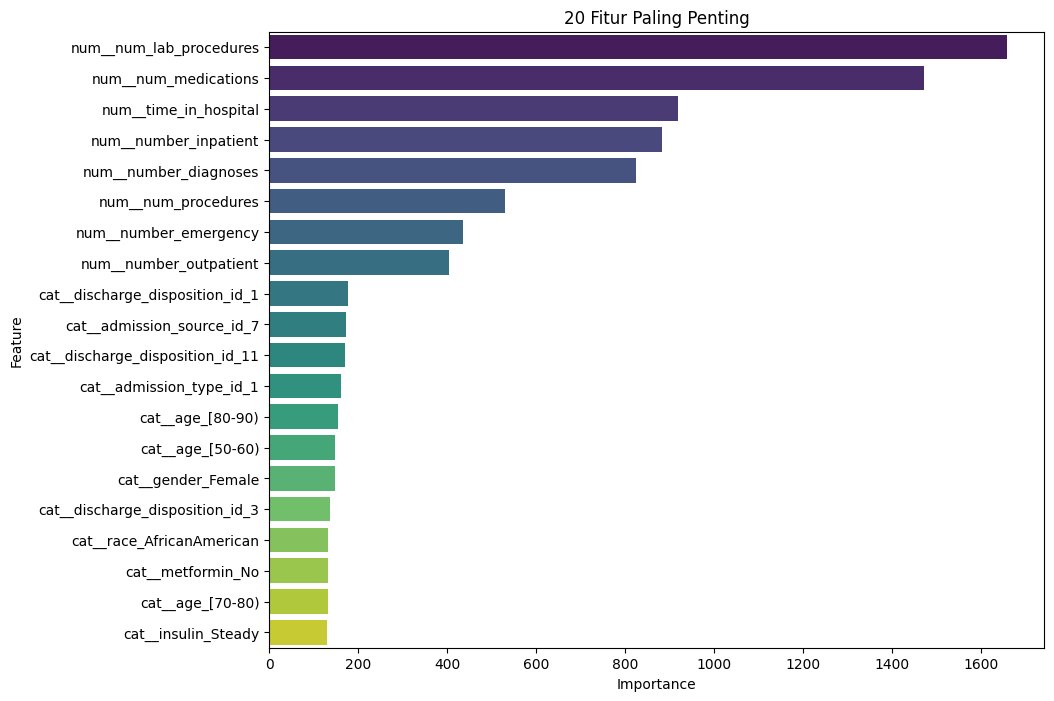

In [18]:
# Visualisasi fitur penting
feature_importances = best_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Membuat DataFrame fitur penting
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 8))
sns.barplot(data=importances_df[:20], x='Importance', y='Feature', palette='viridis')
plt.title("20 Fitur Paling Penting")
plt.show()


Penjelasan ini memberikan ringkasan lengkap tentang kodingan yang digunakan untuk memvisualisasikan fitur-fitur penting dalam model LightGBM setelah dilakukan hyperparameter tuning. Visualisasi ini membantu kita untuk:

Mengetahui Fitur Paling Penting: Dengan melihat peringkat fitur dalam grafik, kita dapat melihat fitur mana yang paling memengaruhi prediksi model.
Mendapatkan Wawasan Mendalam: Mengetahui fitur terpenting dapat memberikan wawasan yang lebih dalam tentang pola dalam data dan faktor-faktor yang signifikan dalam menentukan hasil.
Menyederhanakan Model: Jika ada fitur yang memiliki tingkat kepentingan rendah, kita dapat mempertimbangkan untuk menghapusnya dalam model selanjutnya, yang bisa menyederhanakan model dan meningkatkan efisiensi.
Dengan cara ini, kita dapat memastikan bahwa model yang digunakan hanya fokus pada fitur yang memberikan dampak signifikan terhadap hasil prediksi.

In [19]:
# Pipeline untuk preprocessing
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)


Kode ini mendefinisikan pipeline preprocessing untuk mempersiapkan data sebelum digunakan dalam model machine learning. Berikut penjelasan singkatnya:

Pipeline untuk Data Numerik (num_pipeline):

Menggunakan MinMaxScaler untuk menskalakan data numerik ke rentang nilai antara 0 dan 1.
Pipeline untuk Data Kategorikal (cat_pipeline):

Menggunakan OneHotEncoder untuk mengubah data kategorikal menjadi representasi numerik dengan menciptakan kolom baru untuk setiap kategori unik (one-hot encoding). Parameter handle_unknown='ignore' memastikan kategori baru yang tidak ada saat pelatihan diabaikan.
ColumnTransformer (preprocessor):

Menggabungkan dua pipeline di atas dengan ColumnTransformer.
('num', num_pipeline, num_cols): Memproses kolom numerik (num_cols) dengan pipeline numerik.
('cat', cat_pipeline, cat_cols): Memproses kolom kategorikal (cat_cols) dengan pipeline kategorikal.
Pipeline ini memastikan bahwa data numerik dan kategorikal diproses dengan metode yang sesuai secara otomatis sebelum digunakan untuk pelatihan model.

In [20]:
# Preprocess data latih dan data uji
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


Kode ini memproses data latih (training data) dan data uji (test data) menggunakan preprocessing pipeline yang telah dibuat. Berikut penjelasan langkah-langkahnya:

preprocessor.fit_transform(X_train):

fit_transform: Pipeline preprocessing menyesuaikan parameter scaler dan encoder berdasarkan data latih (X_train) dan langsung menerapkannya untuk mentransformasi data tersebut.
Data latih diubah menjadi format siap pakai untuk model machine learning, misalnya nilai numerik distandardisasi dan nilai kategorikal dikodekan.
preprocessor.transform(X_test):

transform: Pipeline hanya mentransformasi data uji (X_test) berdasarkan parameter yang sudah ditentukan saat fit dengan data latih.
Tidak ada fit ulang pada data uji untuk mencegah kebocoran data (data leakage).
Output:
X_train_prepared: Data latih yang sudah diproses.
X_test_prepared: Data uji yang sudah diproses dengan parameter dari data latih.
Pipeline ini memastikan preprocessing konsisten antara data latih dan data uji.

In [13]:
from sklearn import set_config
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Mengatur konfigurasi untuk visualisasi pipeline
set_config(display='diagram')

# Pipeline preprocessing untuk numerik dan kategorikal
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),  # num_cols adalah kolom numerik
        ('cat', cat_pipeline, cat_cols)  # cat_cols adalah kolom kategorikal
    ]
)

# Pipeline Logistic Regression
logistic_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=5000, random_state=42))
])

# Visualisasi pipeline
logistic_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['time_in_hospital',
                                                   'num_lab_procedures',
                                                   'num_procedures',
                                                   'num_medications',
                                                   'number_outpatient',
                                                   'number_emergency',
                                                   'number_inpatient',
                                                   'number_diagnoses']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['race', 'gender', 'age',
                                                   'admission_type_id',
                                                   'discharge_disposition_id',
                                                   'admission_source_id',
                                                   'max_glu_serum', 'A1Cresult',
                                                   'metformin', 'repaglinide',
                                                   'nateglinide',
                                                   'chlorpropamide',
                                                   'glimepiride', 'glipizide',
                                                   'glyburide', 'pioglitazone',
                                                   'rosiglitazone', 'insulin',
                                                   'change',
                                                   'diabetesMed'])])),
                ('classifier',
                 LogisticRegression(max_iter=5000, random_state=42))])

Kode ini membuat pipeline lengkap untuk proses preprocessing data dan pelatihan model Logistic Regression dalam Scikit-learn. Berikut penjelasan lengkapnya:

Bagian 1: Pengaturan Konfigurasi
set_config(display='diagram'):
Mengatur tampilan pipeline dalam bentuk diagram untuk visualisasi yang lebih jelas dan intuitif.
Bagian 2: Pipeline Preprocessing
num_pipeline:

Menerapkan MinMaxScaler pada kolom numerik (num_cols) untuk menskalakan nilai ke rentang [0, 1].
cat_pipeline:

Menerapkan OneHotEncoder pada kolom kategorikal (cat_cols) untuk mengubah kategori menjadi representasi numerik, dengan opsi handle_unknown='ignore' agar kategori baru tidak menyebabkan error.
ColumnTransformer:

Menggabungkan num_pipeline dan cat_pipeline:
Kolom numerik diproses dengan num_pipeline.
Kolom kategorikal diproses dengan cat_pipeline.
Bagian 3: Pipeline Logistic Regression
logistic_pipeline:
Pipeline lengkap untuk seluruh proses:
preprocessor: Preprocessing data (numerik dan kategorikal) menggunakan pipeline yang telah dibuat.
classifier: Model Logistic Regression dengan parameter:
max_iter=1000: Memastikan iterasi cukup untuk mencapai konvergensi.
random_state=42: Menetapkan seed untuk hasil yang dapat direproduksi.
Visualisasi Pipeline
logistic_pipeline:
Menampilkan diagram lengkap pipeline, yang memvisualisasikan alur dari preprocessing data hingga model Logistic Regression.
Pipeline ini mengintegrasikan preprocessing dan model ke dalam satu langkah, sehingga mempermudah proses pengolahan dan pelatihan data.

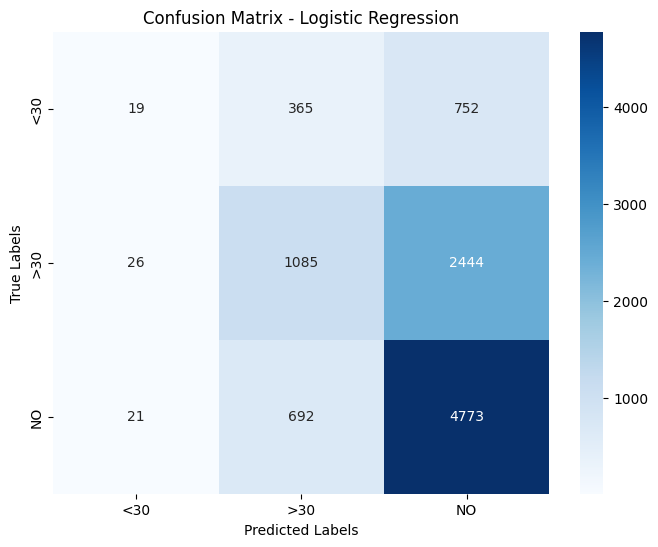

In [23]:
# Melatih model Logistic Regression
logistic_pipeline.fit(X_train, y_train)

# Prediksi dengan model Logistic Regression
y_test_pred_logistic = logistic_pipeline.predict(X_test)

# Membuat Confusion Matrix
cm_logistic = confusion_matrix(y_test, y_test_pred_logistic)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Kode ini melatih model Logistic Regression dengan pipeline preprocessing, membuat prediksi, dan mengevaluasinya menggunakan Confusion Matrix yang divisualisasikan dengan heatmap:

Pelatihan Model: Data latih diproses oleh pipeline dan Logistic Regression dilatih.
Prediksi: Model digunakan untuk memprediksi label pada data uji.
Evaluasi: Confusion Matrix dibuat untuk membandingkan prediksi dengan label sebenarnya.
Visualisasi: Heatmap Confusion Matrix menunjukkan performa klasifikasi dengan jelas.

In [32]:
# ============================ Decision Tree Model ============================
decision_tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Hyperparameter tuning untuk Decision Tree
decision_tree_param_grid = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

decision_tree_grid_search = GridSearchCV(
    estimator=decision_tree_pipeline,
    param_grid=decision_tree_param_grid,
    scoring='f1_micro',
    cv=5,
    verbose=2,
    n_jobs=-1
)



Kode ini membangun pipeline model Decision Tree dengan preprocessing data, hyperparameter tuning, dan evaluasi menggunakan GridSearchCV. Berikut penjelasan singkatnya:

1. Pipeline Decision Tree
Pipeline:
Menggabungkan preprocessing (preprocessor) dengan model DecisionTreeClassifier.
random_state=42: Menetapkan seed untuk hasil yang konsisten.
2. Hyperparameter Tuning
decision_tree_param_grid:
Parameter yang diuji:
max_depth: Kedalaman maksimum pohon (mencegah overfitting).
min_samples_split: Jumlah minimum sampel untuk membagi node.
GridSearchCV:
Melakukan pencarian kombinasi parameter terbaik menggunakan cross-validation (cv=5).
scoring='f1_micro': Metrik evaluasi menggunakan F1-score rata-rata mikro.
n_jobs=-1: Menggunakan semua core CPU untuk mempercepat pencarian.
Kesimpulan:
Kode ini bertujuan untuk menemukan model Decision Tree dengan performa terbaik melalui tuning parameter sambil memastikan preprocessing dilakukan secara konsisten. Setelah ini, model dapat dievaluasi pada data uji.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Best F1-Score for Decision Tree: 0.5749
F1-Score on Test Data for Decision Tree: 0.5744
Confusion Matrix for Decision Tree:
[[  19  462  655]
 [  31 1364 2160]
 [   5 1018 4463]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

         <30       0.35      0.02      0.03      1136
         >30       0.48      0.38      0.43      3555
          NO       0.61      0.81      0.70      5486

    accuracy                           0.57     10177
   macro avg       0.48      0.40      0.39     10177
weighted avg       0.54      0.57      0.53     10177



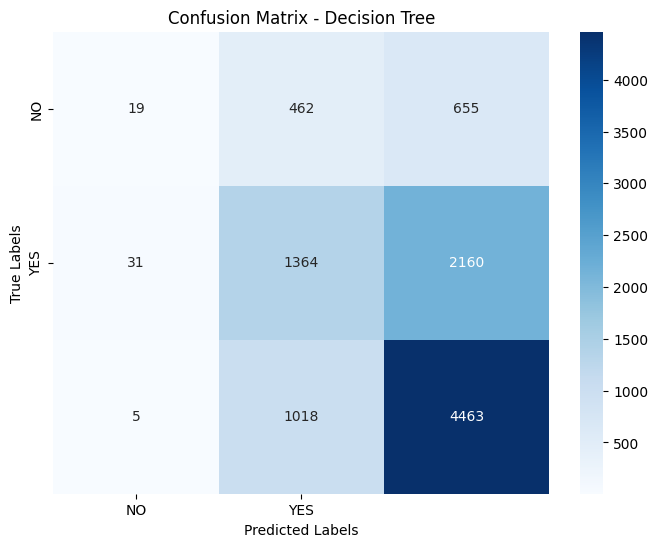

In [33]:
# Melatih model Decision Tree menggunakan GridSearchCV
decision_tree_grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik untuk Decision Tree
print(f"Best Parameters for Decision Tree: {decision_tree_grid_search.best_params_}")
print(f"Best F1-Score for Decision Tree: {decision_tree_grid_search.best_score_:.4f}")

# Evaluasi pada data uji
decision_tree_best_model = decision_tree_grid_search.best_estimator_
y_test_pred_decision_tree = decision_tree_best_model.predict(X_test)

# F1-Score pada data uji
decision_tree_test_f1_score = f1_score(y_test, y_test_pred_decision_tree, average="micro")
print(f"F1-Score on Test Data for Decision Tree: {decision_tree_test_f1_score:.4f}")

# Confusion Matrix
cm_decision_tree = confusion_matrix(y_test, y_test_pred_decision_tree)
print(f"Confusion Matrix for Decision Tree:")
print(cm_decision_tree)

# Classification Report
report_decision_tree = classification_report(y_test, y_test_pred_decision_tree)
print(f"Classification Report for Decision Tree:")
print(report_decision_tree)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_decision_tree, annot=True, fmt='g', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Decision Tree')
plt.show()


Kode ini melatih model Decision Tree dengan GridSearchCV, mengevaluasinya pada data uji, dan memvisualisasikan hasil evaluasi. Berikut penjelasan tiap langkah:

1. Melatih Model dengan GridSearchCV
fit(X_train, y_train): Melatih model menggunakan GridSearchCV dengan cross-validation untuk mencari kombinasi hyperparameter terbaik dari param_grid.
Parameter terbaik ditampilkan melalui best_params_, sedangkan skor terbaik (F1-Score mikro) dari cross-validation ditampilkan melalui best_score_.
2. Evaluasi pada Data Uji
Model Terbaik: Mengambil model dengan parameter terbaik dari GridSearchCV menggunakan best_estimator_.
Prediksi: Model terbaik memprediksi label pada data uji (y_test) melalui predict.
F1-Score: Mengukur performa model pada data uji dengan metrik F1-Score (average="micro").
Confusion Matrix: Dibuat untuk membandingkan prediksi dengan label sebenarnya, membantu memahami distribusi kesalahan.
3. Classification Report
classification_report:
Menampilkan precision, recall, F1-Score, dan support untuk setiap kelas.
Berguna untuk analisis lebih rinci performa model pada tiap kategori.
4. Visualisasi
Heatmap Confusion Matrix:
Menggunakan Seaborn untuk menampilkan matriks sebagai grafik.
Label Kelas: Ditampilkan pada sumbu x dan y untuk memudahkan interpretasi.
Kesimpulan:
Kode ini mengintegrasikan pelatihan, tuning, evaluasi, dan visualisasi hasil Decision Tree. Hasil analisis dapat digunakan untuk mengukur seberapa baik model bekerja pada data uji berdasarkan F1-Score, Confusion Matrix, dan laporan klasifikasi.

c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1-Score on Test Data for XGBoost: 0.5835
Confusion Matrix for XGBoost:
[[  48  433  655]
 [  42 1373 2140]
 [  30  939 4517]]


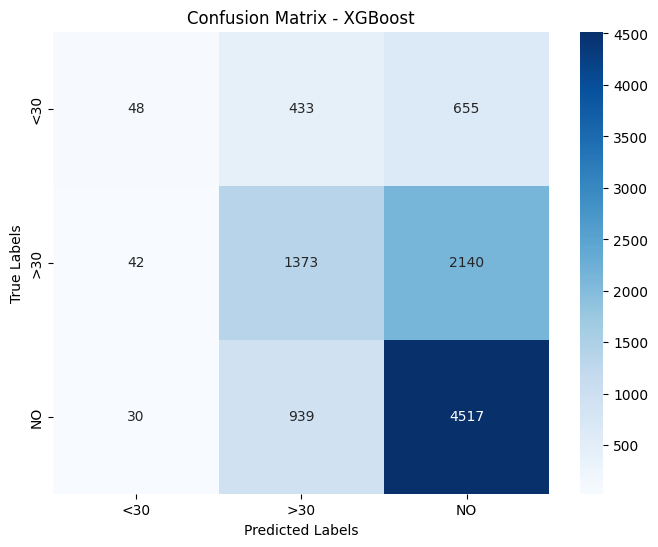

In [13]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Label encoding untuk target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# ============================ XGBoost Classifier Model ============================
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Melatih model XGBoost
xgb_pipeline.fit(X_train, y_train_encoded)

# Evaluasi pada data uji
y_test_pred_xgb = xgb_pipeline.predict(X_test)

# F1-Score
xgb_test_f1_score = f1_score(y_test_encoded, y_test_pred_xgb, average="micro")
print(f"F1-Score on Test Data for XGBoost: {xgb_test_f1_score:.4f}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_encoded, y_test_pred_xgb)
print(f"Confusion Matrix for XGBoost:")
print(cm_xgb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - XGBoost')
plt.show()




Kode ini membangun model XGBoost untuk klasifikasi, menggunakan pipeline yang mencakup preprocessing data, label encoding untuk target, evaluasi performa model, dan visualisasi hasil. Berikut penjelasan detailnya:

1. Label Encoding
LabelEncoder:
Mengonversi target (y_train dan y_test) dari bentuk string ke nilai numerik untuk kompatibilitas dengan XGBClassifier.
fit_transform: Menerapkan encoding pada data latih.
transform: Menerapkan encoding yang sama pada data uji.
2. Pipeline XGBoost
Pipeline:
preprocessor: Menangani preprocessing data (scaling dan encoding).
XGBClassifier: Model XGBoost untuk klasifikasi.
use_label_encoder=False: Menggunakan metode encoding default Scikit-learn.
eval_metric='logloss': Menggunakan log-loss sebagai metrik evaluasi selama pelatihan.
3. Pelatihan Model
fit(X_train, y_train_encoded):
Melatih model XGBoost dengan data latih yang telah diproses.
4. Evaluasi
Prediksi:
Menggunakan model yang dilatih untuk memprediksi label pada data uji (X_test).
F1-Score:
Menghitung F1-Score mikro untuk mengukur keseimbangan antara precision dan recall pada semua kelas.
Confusion Matrix:
Menghasilkan matriks yang menunjukkan distribusi prediksi benar dan salah untuk setiap kelas.
5. Visualisasi
Heatmap Confusion Matrix:
Memvisualisasikan hasil Confusion Matrix menggunakan Seaborn.
Label Kelas:
Sumbu x: Label prediksi.
Sumbu y: Label sebenarnya.
Judul: "Confusion Matrix - XGBoost" untuk memperjelas bahwa ini hasil model XGBoost.
Kesimpulan
Kode ini membangun pipeline end-to-end untuk melatih dan mengevaluasi model XGBoost. Hasil evaluasi mencakup F1-Score dan Confusion Matrix, yang membantu memahami kinerja model secara menyeluruh pada data uji. Visualisasi heatmap mempermudah analisis distribusi prediksi model.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression  # Tambahkan import ini
from sklearn.model_selection import train_test_split, GridSearchCV
# ============================ Membuat Pipeline untuk Berbagai Model ============================
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('k-NN', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1.0, 10],
        'classifier__max_iter': [100, 200]
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 10],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'k-NN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
}


Kode ini membuat pipeline yang fleksibel untuk beberapa model machine learning, termasuk Logistic Regression, Decision Tree, k-Nearest Neighbors (k-NN), dan XGBoost. Selain itu, kode juga mendefinisikan grid parameter untuk tuning hyperparameter setiap model. Berikut penjelasannya:

1. Model dalam Pipeline
models: Daftar model yang akan diuji, masing-masing terdiri dari nama dan instansiasi modelnya:
Logistic Regression
Decision Tree
k-NN
XGBoost
Setiap model akan digunakan sebagai bagian akhir dari pipeline.
2. Parameter Tuning
param_grids:
Dictionary yang mencakup hyperparameter untuk setiap model, disesuaikan dengan kebutuhan masing-masing:
Logistic Regression:
C: Parameter regularisasi.
max_iter: Jumlah iterasi maksimum.
Decision Tree:
max_depth: Kedalaman maksimum pohon.
min_samples_split: Jumlah sampel minimum untuk memecah node.
k-NN:
n_neighbors: Jumlah tetangga terdekat yang dipertimbangkan.
weights: Bobot tetangga (seragam atau berdasarkan jarak).
XGBoost:
n_estimators: Jumlah pohon dalam ensemble.
learning_rate: Kecepatan pembaruan model pada setiap iterasi.
3. Pipeline dan Preprocessing
Pipeline:
Preprocessing dengan ColumnTransformer, yang mencakup:
MinMaxScaler: Untuk data numerik.
OneHotEncoder: Untuk data kategorikal.
classifier: Diganti sesuai model yang sedang diuji.
Pipeline akan memastikan preprocessing diterapkan secara konsisten sebelum melatih model.
4. Penggunaan
Setiap model dari models akan dilatih menggunakan pipeline.
param_grids digunakan dalam GridSearchCV untuk menemukan kombinasi hyperparameter terbaik untuk setiap model.
Kesimpulan
Kode ini memungkinkan pengujian berbagai model machine learning dengan preprocessing terintegrasi. Grid parameter tuning mempermudah pencarian model terbaik. Ini adalah pendekatan modular yang efisien untuk eksperimen dengan banyak model dan parameter.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression  # Tambahkan import ini
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Hyperparameter tuning dengan GridSearchCV untuk setiap model
for model_name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Melatih model dengan GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Memprediksi data pengujian
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Evaluasi akurasi model dan menampilkan report
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAkurasi Terbaik {model_name} (Setelah Hyperparameter Tuning): {accuracy:.2f}")
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")

print("\nHyperparameter Tuning dan evaluasi model selesai.")


c:\Users\figoh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Akurasi Terbaik Logistic Regression (Setelah Hyperparameter Tuning): 0.58
Best Parameters for Logistic Regression: {'classifier__C': 10, 'classifier__max_iter': 200}
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         <30       0.30      0.02      0.03      1136
         >30       0.51      0.30      0.38      3555
          NO       0.60      0.87      0.71      5486

    accuracy                           0.58     10177
   macro avg       0.47      0.40      0.37     10177
weighted avg       0.53      0.58      0.52     10177


Akurasi Terbaik Decision Tree (Setelah Hyperparameter Tuning): 0.57
Best Parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Classification Report for Decision Tree:
              precision    recall  f1-score   support

         <30       0.35      0.02      0.03      1136
         >30       0.48      0.38      0.43      3555
          NO       0.61      0.8

Kode ini melakukan hyperparameter tuning menggunakan GridSearchCV untuk beberapa model machine learning (Logistic Regression, Decision Tree, k-NN, dan XGBoost) yang dikombinasikan dengan pipeline preprocessing. Untuk setiap model, pipeline terdiri dari langkah preprocessing data dan model klasifikasi. Hyperparameter tuning dilakukan dengan cross-validation 5-fold menggunakan metrik akurasi. Setelah menemukan parameter terbaik, model terbaik digunakan untuk memprediksi data uji, diikuti dengan evaluasi akurasi dan penampilan laporan klasifikasi. Hasilnya mencakup akurasi terbaik, parameter optimal, dan metrik evaluasi untuk setiap model, memastikan proses yang efisien dan hasil yang dapat dibandingkan.